<a href="https://colab.research.google.com/github/fboldt/aulasml/blob/master/aula8b_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from sklearn.datasets import load_iris
dataset = load_iris()
X = dataset.data
y = dataset.target

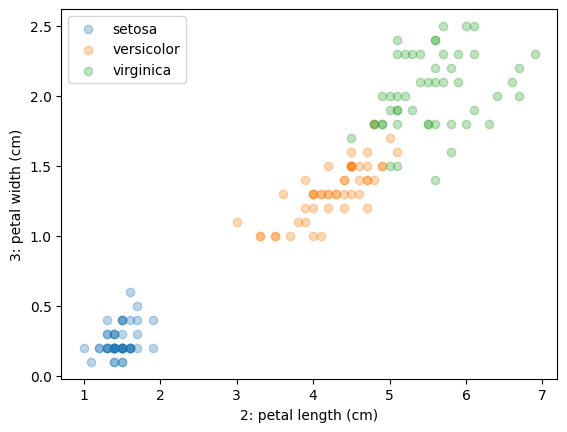

In [33]:
import matplotlib.pyplot as plt
i, j = 2, 3
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(y):
  plt.scatter(X[y==k, i], X[y==k, j], label=dataset.target_names[k], alpha=0.3)
plt.legend()
plt.show()

In [34]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from collections import Counter
import numpy as np

def maisFrequente(y):
  counter = Counter(y)
  maisFreq = counter.most_common(1)[0][0]
  return maisFreq


In [39]:
import random
def sorteiaCaracteristica(X):
  caracteristica = random.randint(a=0, b=X.shape[1]-1)
  valor = random.uniform(a=np.min(X[:,caracteristica]), b=np.max(X[:,caracteristica]))
  return caracteristica, valor
sorteiaCaracteristica(X)

(2, 2.418103166879747)

In [48]:
class Arvore(BaseEstimator, ClassifierMixin):
  def fit(self, X, y):
    self.caracteristica_do_no, self.valor_do_no = sorteiaCaracteristica(X)
    valores_maiores = X[:, self.caracteristica_do_no] > self.valor_do_no
    if sum(valores_maiores)>0 and sum(~valores_maiores)>0:
      self.arvore_de_exemplos_maiores = Arvore()
      self.arvore_de_exemplos_maiores.fit(X[valores_maiores], y[valores_maiores])
      self.arvore_de_exemplos_menores = Arvore()
      self.arvore_de_exemplos_menores.fit(X[~valores_maiores], y[~valores_maiores])
    else:
      self.resposta = maisFrequente(y)
    return self
  def predict(self, X):
    y = np.empty(X.shape[0], dtype=np.int64)
    if hasattr(self, 'resposta'):
      y.fill(self.resposta)
    else:
      valores_maiores = X[:, self.caracteristica_do_no] > self.valor_do_no
      y[valores_maiores] = self.arvore_de_exemplos_maiores.predict(X[valores_maiores])
      y[~valores_maiores] = self.arvore_de_exemplos_menores.predict(X[~valores_maiores])
    return y

modelo = Arvore()
modelo.fit(X, y)
ypred = modelo.predict(X)
print(accuracy_score(y, ypred))
results = cross_validate(Arvore(), X, y)
results['test_score'], np.mean(results['test_score'])

0.9733333333333334


(array([0.93333333, 0.9       , 0.9       , 0.86666667, 0.93333333]),
 0.9066666666666666)

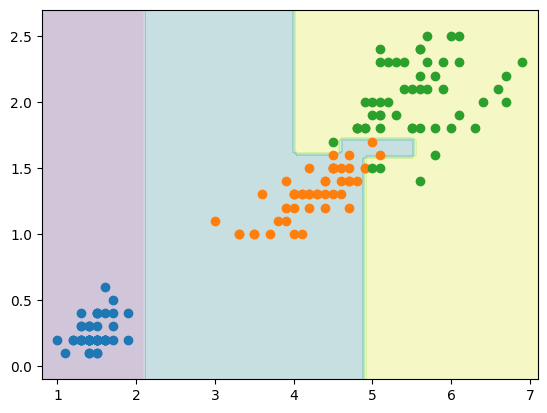

In [54]:
def plotDecisao(modelo, X, y):
    modelo.fit(X, y)
    x0s = np.linspace(np.min(X[:,0])-0.2, np.max(X[:,0])+0.2, 100)
    x1s = np.linspace(np.min(X[:,1])-0.2, np.max(X[:,1])+0.2, 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    Xdec = np.c_[x0.ravel(), x1.ravel()]
    ypred = modelo.predict(Xdec)
    plt.contourf(x0, x1, ypred.reshape(x0.shape), alpha=0.25)
    for k in set(y):
        plt.plot(X[:,0][y==k], X[:,1][y==k], 'o', label=f"{dataset.target_names[k]} [{k}]")
    plt.show()

plotDecisao(Arvore(), X[:,2:], y)

In [70]:
from sklearn.ensemble import BaggingClassifier
modelo = BaggingClassifier(estimator=Arvore(), n_estimators=10)
results = cross_validate(modelo, X, y)
results['test_score'], np.mean(results['test_score'])

(array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 0.96666667]), 0.96)

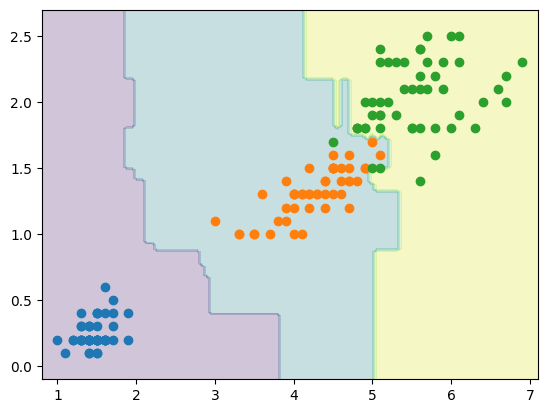

In [71]:
plotDecisao(modelo, X[:,2:], y)

In [73]:
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier(n_estimators=10)
results = cross_validate(modelo, X, y)
results['test_score'], np.mean(results['test_score'])

(array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ]), 0.96)

In [75]:
from sklearn.ensemble import ExtraTreesClassifier
modelo = ExtraTreesClassifier(n_estimators=10)
results = cross_validate(modelo, X, y)
results['test_score'], np.mean(results['test_score'])

(array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ]), 0.96)